In [99]:
import pandas as pd
import numpy as np
import autogluon.eda.auto as auto
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from scipy.sparse import coo_matrix
from sklearn.utils import resample
from prettytable import PrettyTable
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [100]:
train_data = pd.read_csv(r'C:\Users\wrigh\Code\MachineLearning\customer_churn\data\train.csv')

In [101]:
train_data.shape

(4250, 20)

In [102]:
train_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [103]:
train_data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [104]:
test_data = pd.read_csv(r'C:\Users\wrigh\Code\MachineLearning\customer_churn\data\test.csv')

In [105]:
test_data.shape

(750, 20)

In [106]:
test_data.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [107]:
test_data.describe()

,id,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,375.50000,100.385333,8.454667,180.454933,100.721333,30.677920,203.258267,100.273333,17.277080,199.619467,100.370667,8.982827,10.294133,4.485333,2.779933,1.634667
std,216.65064,39.699029,14.123712,53.258337,19.718539,9.053756,52.185471,19.367535,4.435638,51.531351,19.185238,2.318920,2.770340,2.421901,0.747704,1.276207
min,1.00000,1.000000,0.000000,12.500000,39.000000,2.130000,31.200000,37.000000,2.650000,50.900000,12.000000,2.290000,0.000000,0.000000,0.000000,0.000000
25%,188.25000,74.000000,0.000000,146.625000,88.000000,24.925000,166.800000,87.000000,14.177500,164.475000,88.000000,7.402500,8.525000,3.000000,2.305000,1.000000
50%,375.50000,101.000000,0.000000,178.200000,101.000000,30.295000,203.350000,101.000000,17.285000,199.450000,100.500000,8.975000,10.300000,4.000000,2.780000,1.000000
75%,562.75000,126.000000,21.000000,215.975000,114.000000,36.715000,235.975000,113.000000,20.057500,234.800000,113.000000,10.565000,12.100000,6.000000,3.270000,2.000000
max,750.00000,238.000000,51.000000,350.800000,163.000000,59.640000,363.700000,164.000000,30.910000,364.300000,168.000000,16.390000,18.900000,19.000000,5.100000,6.000000


# EDA

In [108]:
target_col = 'churn'

**`train_data` dataset summary**

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing_count,missing_ratio,raw_type,special_types
account_length,4250,215,,,100.236235,39.698401,1.0,73.0,100.0,127.0,243.0,int64,,,int,
area_code,4250,3,area_code_415,2108,,,,,,,,object,,,object,
churn,4250,2,no,3652,,,,,,,,object,,,object,
international_plan,4250,2,no,3854,,,,,,,,object,,,object,
number_customer_service_calls,4250,10,,,1.559059,1.311434,0.0,1.0,1.0,2.0,9.0,int64,,,int,
number_vmail_messages,4250,46,,,7.631765,13.439882,0.0,0.0,0.0,16.0,52.0,int64,,,int,
state,4250,51,WV,139,,,,,,,,object,,,object,
total_day_calls,4250,120,,,99.907294,19.850817,0.0,87.0,100.0,113.0,165.0,int64,,,int,
total_day_charge,4250,1843,,,30.644682,9.182096,0.0,24.365,30.68,36.75,59.76,float64,,,float,
total_day_minutes,4250,1843,,,180.2596,54.012373,0.0,143.325,180.45,216.2,351.5,float64,,,float,


**`test_data` dataset summary**

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing_count,missing_ratio,raw_type,special_types
account_length,4250,215,,,100.236235,39.698401,1.0,73.0,100.0,127.0,243.0,int64,,,int,
area_code,4250,3,area_code_415,2108,,,,,,,,object,,,object,
churn,4250,2,no,3652,,,,,,,,object,,,object,
international_plan,4250,2,no,3854,,,,,,,,object,,,object,
number_customer_service_calls,4250,10,,,1.559059,1.311434,0.0,1.0,1.0,2.0,9.0,int64,,,int,
number_vmail_messages,4250,46,,,7.631765,13.439882,0.0,0.0,0.0,16.0,52.0,int64,,,int,
state,4250,51,WV,139,,,,,,,,object,,,object,
total_day_calls,4250,120,,,99.907294,19.850817,0.0,87.0,100.0,113.0,165.0,int64,,,int,
total_day_charge,4250,1843,,,30.644682,9.182096,0.0,24.365,30.68,36.75,59.76,float64,,,float,
total_day_minutes,4250,1843,,,180.2596,54.012373,0.0,143.325,180.45,216.2,351.5,float64,,,float,


### Feature Distance

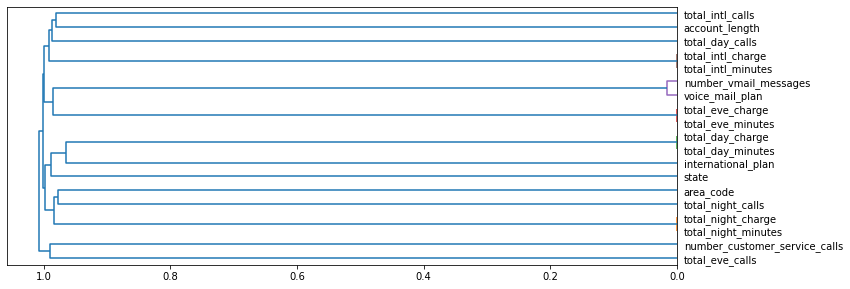

**The following feature groups are considered as near-duplicates**:

Distance threshold: <= `0.01`. Consider keeping only some of the columns within each group:

 - `total_day_charge`, `total_day_minutes` - distance `0.00`
 - `total_eve_charge`, `total_eve_minutes` - distance `0.00`
 - `total_night_charge`, `total_night_minutes` - distance `0.00`
 - `total_intl_charge`, `total_intl_minutes` - distance `0.00`

**Near duplicate group analysis: `total_day_charge`, `total_day_minutes` - distance `0.0000`**

Feature interaction between `total_day_charge`/`total_day_minutes`

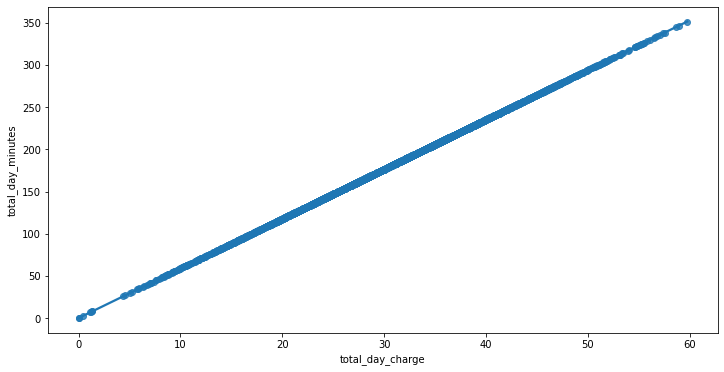

**Near duplicate group analysis: `total_eve_charge`, `total_eve_minutes` - distance `0.0000`**

Feature interaction between `total_eve_charge`/`total_eve_minutes`

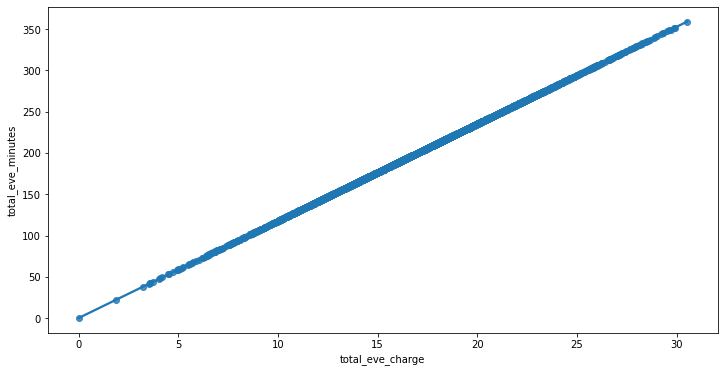

**Near duplicate group analysis: `total_night_charge`, `total_night_minutes` - distance `0.0000`**

Feature interaction between `total_night_charge`/`total_night_minutes`

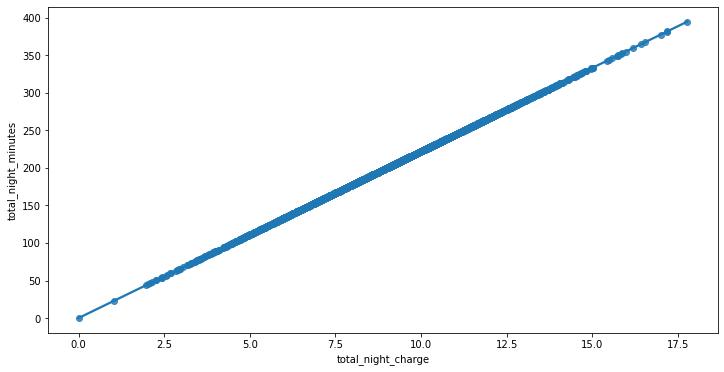

**Near duplicate group analysis: `total_intl_charge`, `total_intl_minutes` - distance `0.0000`**

Feature interaction between `total_intl_charge`/`total_intl_minutes`

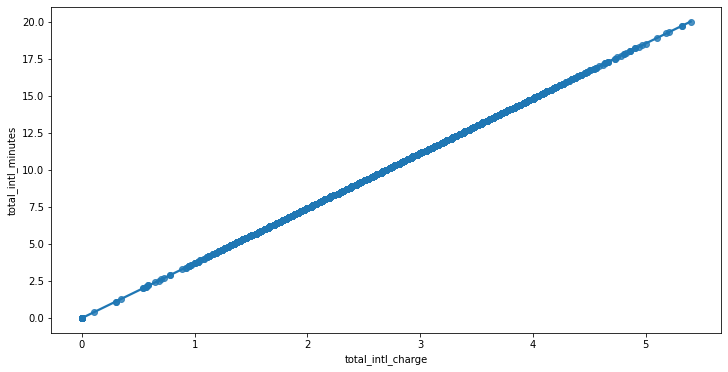

In [109]:
auto.dataset_overview(train_data=train_data, test_data=train_data, label=target_col)

In [110]:
# features in train and test data have wildly different variance and mean.
# would be a good idea to scale these

## Target variable analysis

### Label Insights

 - Moderate minority class imbalance detected - imbalance ratio is `16.37%`. Recommendations:
   - downsample majority class `no` to improve the balance
   - upweight downsampled class so that `sample_weight = original_weight x downsampling_factor`.[TabularPredictor](https://auto.gluon.ai/stable/api/autogluon.predictor.html#module-0) supports this via `sample_weight` parameter

,count,unique,top,freq,dtypes,missing_count,missing_ratio,raw_type,special_types
churn,4250,2,no,3652,object,,,object,


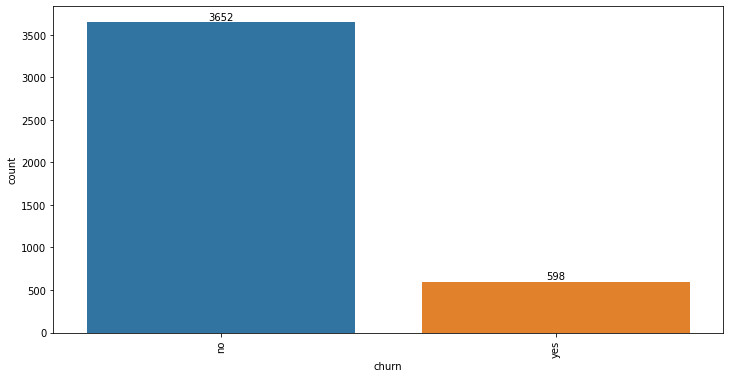

### Target variable correlations
 - ⚠️ no fields with absolute correlation greater than `0.5` found for target variable `churn`.

In [111]:
auto.target_analysis(train_data=train_data, label=target_col)

In [112]:
# remove high correlation features detected by autoeda
train_data = train_data.drop(columns=['total_intl_minutes', 'total_night_minutes',
                              'total_eve_minutes', 'total_day_minutes'])

# Train/test split

In [113]:
train_data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,88,37.09,108,29.62,118,9.57,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,70,32.01,88,20.72,79,9.62,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,89,30.24,82,11.15,89,8.38,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,101,29.02,126,16.41,104,5.81,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,127,40.07,126,18.96,116,13.39,5,2.67,2,no


In [114]:
train_data['churn'] = train_data['churn'].replace(['yes', 'no'], [1,0])

In [115]:
train_data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
1,NJ,137,area_code_415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
2,OH,84,area_code_408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
3,OK,75,area_code_415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
4,MA,121,area_code_510,no,yes,24,88,37.09,108,29.62,118,9.57,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,70,32.01,88,20.72,79,9.62,6,2.78,0,0
4246,WV,73,area_code_408,no,no,0,89,30.24,82,11.15,89,8.38,6,3.11,3,0
4247,NC,75,area_code_408,no,no,0,101,29.02,126,16.41,104,5.81,7,1.86,1,0
4248,HI,50,area_code_408,no,yes,40,127,40.07,126,18.96,116,13.39,5,2.67,2,0


In [116]:
y = train_data['churn']
# X = train_data.drop(columns=['churn'])

In [117]:
# stratify due to imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y, random_state=1)

# Features

## Categorical

In [118]:
cat_columns = train_data.select_dtypes(exclude=[np.number])

In [119]:
cat_columns

,state,area_code,international_plan,voice_mail_plan
0,OH,area_code_415,no,yes
1,NJ,area_code_415,no,no
2,OH,area_code_408,yes,no
3,OK,area_code_415,yes,no
4,MA,area_code_510,no,yes
...,...,...,...,...
4245,MT,area_code_415,no,no
4246,WV,area_code_408,no,no
4247,NC,area_code_408,no,no
4248,HI,area_code_408,no,yes


In [120]:
# turn state into numerical column
vectorizer = CountVectorizer()
train_state = vectorizer.fit_transform(X_train['state'].values)
test_state = vectorizer.fit_transform(X_test['state'].values)

In [121]:
state_feature = vectorizer.get_feature_names_out()

In [122]:
state_feature

array(['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me',
       'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm',
       'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy'], dtype=object)

In [123]:
train_state

<3825x51 sparse matrix of type '<class 'numpy.int64'>'
	with 3825 stored elements in Compressed Sparse Row format>

In [124]:
train_data['state'].shape

(4250,)

In [125]:
# convert area code
vectorizer = CountVectorizer()
train_area_code = vectorizer.fit_transform(X_train['area_code'].values)
test_area_code = vectorizer.fit_transform(X_test['area_code'].values)

In [126]:
area_code_feature = vectorizer.get_feature_names_out()

In [127]:
area_code_feature

array(['area_code_408', 'area_code_415', 'area_code_510'], dtype=object)

In [128]:
train_area_code.shape

(3825, 3)

In [129]:
# international plan
vectorizer = CountVectorizer()
train_intl_plan = vectorizer.fit_transform(X_train['international_plan'].values)
test_intl_plan = vectorizer.fit_transform(X_test['international_plan'].values)

In [130]:
vectorizer.get_feature_names_out()

array(['no', 'yes'], dtype=object)

In [131]:
intl_feature = ['intl_plan_no', 'intl_plan_yes']
intl_feature

['intl_plan_no', 'intl_plan_yes']

In [132]:
# voice_mail_plan
vectorizer = CountVectorizer()
train_vm_plan = vectorizer.fit_transform(X_train['voice_mail_plan'].values)
test_vm_plan = vectorizer.fit_transform(X_test['voice_mail_plan'].values)

In [133]:
vectorizer.get_feature_names_out()

array(['no', 'yes'], dtype=object)

In [134]:
voice_mail_plan_feature = ['voice_plan_no', 'voice_plan_yes']
voice_mail_plan_feature

['voice_plan_no', 'voice_plan_yes']

## Numerical features

In [135]:
numeric_cols = train_data.select_dtypes(include=[np.number])

In [136]:
numeric_cols = numeric_cols.drop(columns=['churn'])

In [137]:
numeric_cols

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,26,123,27.47,103,16.62,103,11.45,3,3.70,1
1,137,0,114,41.38,110,10.30,104,7.32,5,3.29,0
2,84,0,71,50.90,88,5.26,89,8.86,7,1.78,2
3,75,0,113,28.34,122,12.61,121,8.41,3,2.73,3
4,121,24,88,37.09,108,29.62,118,9.57,7,2.03,3
...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,70,32.01,88,20.72,79,9.62,6,2.78,0
4246,73,0,89,30.24,82,11.15,89,8.38,6,3.11,3
4247,75,0,101,29.02,126,16.41,104,5.81,7,1.86,1
4248,50,40,127,40.07,126,18.96,116,13.39,5,2.67,2


In [138]:
train_numerical = X_train[numeric_cols.columns]
test_numerical = X_test[numeric_cols.columns]

In [139]:
train_numerical.shape

(3825, 11)

In [140]:
test_numerical.shape

(425, 11)

In [141]:
# scale numeric data
scaler = StandardScaler()
train_numerical_scaled = scaler.fit_transform(train_numerical)
test_numerical_scaled = scaler.fit_transform(test_numerical)

In [142]:
train_numerical_scaled.shape

(3825, 11)

In [143]:
test_numerical_scaled.shape

(425, 11)

## Merge vanilla and transformed features together

In [144]:
# follow steps in this link to just convert
# resulting np matrix to dataframe
# https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

X_train_merged = hstack((train_numerical_scaled, train_vm_plan, train_intl_plan, train_area_code, train_state))
X_test_merged = hstack((test_numerical_scaled, test_vm_plan, test_intl_plan, test_area_code, test_state))

In [145]:
X_train_merged.shape

(3825, 69)

In [146]:
X_test_merged.shape

(425, 69)

In [147]:
numeric_cols = ['account_length', 'number_vmail_messages', 'total_day_calls',
        'total_day_charge', 'total_eve_calls', 'total_eve_charge',
        'total_night_calls', 'total_night_charge', 'total_intl_calls',
        'total_intl_charge', 'number_customer_service_calls']

In [148]:
numeric_cols

['account_length',
 'number_vmail_messages',
 'total_day_calls',
 'total_day_charge',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_calls',
 'total_night_charge',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [149]:
voice_mail_plan_feature

['voice_plan_no', 'voice_plan_yes']

In [150]:
intl_feature

['intl_plan_no', 'intl_plan_yes']

In [151]:
area_code_feature = ['area_code_408', 'area_code_415', 'area_code_510']

In [152]:
area_code_feature

['area_code_408', 'area_code_415', 'area_code_510']

In [153]:
state_feature = ['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me',
       'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm',
       'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']

In [154]:
# NOTE: ERROR IN BELOW CELL WHERE SOME FEATURES WERE STILL NUMPY ARRAYS
# AND OTHERS WERE LISTS
# NEED TO LOOK INTO AND MAKE SURE ALL ARE LISTS AT OUTPUT

In [155]:
# get all features in one list
all_features = numeric_cols + voice_mail_plan_feature + intl_feature + area_code_feature + state_feature

# Modeling
-    Approach 1: use AutoGluon

In [156]:
from autogluon.tabular import TabularPredictor

In [157]:
target_col

'churn'

In [158]:
X_train_merged

<3825x69 sparse matrix of type '<class 'numpy.float64'>'
	with 57375 stored elements in COOrdinate format>

In [159]:
X_train_merged = pd.DataFrame.sparse.from_spmatrix(X_train_merged)

In [160]:
X_train_merged

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.097831,-0.569107,2.069829,2.295138,1.339996,1.279050,0.216729,-1.234780,-0.161836,-1.111233,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.822979,-0.569107,0.454260,0.013352,-2.110229,1.770259,-0.427280,-0.157631,0.656977,1.389450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.628581,-0.569107,-0.252551,-1.370539,0.639950,-0.837826,-1.517140,-0.148765,-0.571243,-0.776917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.151538,-0.569107,1.514477,-1.092671,-0.710138,0.322363,-3.300547,0.702316,0.247571,2.111573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.881319,-0.569107,-0.404011,0.031876,-1.860213,-0.798061,-1.071288,0.649123,0.656977,-1.178096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,0.780224,-0.569107,0.908639,1.557426,-0.560128,-0.393399,0.216729,0.480680,-1.390056,0.159168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3821,-0.104359,-0.569107,0.858152,0.379484,0.989973,1.784293,-0.229123,-2.028236,0.247571,0.333012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3822,0.426391,-0.569107,1.060098,0.339166,0.189921,0.989003,0.761659,-0.738316,0.247571,0.092304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3823,-1.140586,-0.569107,0.757179,0.757602,-0.160102,-0.683446,0.860737,0.706748,-0.161836,-0.201894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
y_train = y_train.sort_index()

In [180]:
y_train['churn'].mean()

0.14065359477124184

In [182]:
y_train = y_train.drop(columns=['level_0'])

In [183]:
y_train

,churn
0,0
1,0
2,0
3,0
4,0
...,...
3820,0
3821,0
3822,0
3823,0


In [184]:
test = pd.merge(X_train_merged, y_train, left_index=True, right_index=True)

In [185]:
test.shape

(3825, 70)

In [187]:
predictor = TabularPredictor(label=target_col).fit(test)

No path specified. Models will be saved in: "AutogluonModels\ag-20230611_194223\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230611_194223\"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19044
Train Data Rows:    3825
Train Data Columns: 69
Label Column: churn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    19823.9 MB
	Train Data (Original)  Memory Usage: 0.69 MB (0